# Online Retail Segmentation

In [349]:
# data analysis and manipulation tool
import pandas as pd

# perform numerical computation
import numpy as np

# data viz library
import matplotlib.pyplot as plt 
import seaborn as sns

In [350]:
df = pd.read_excel("Data/OnlineRetail.xlsx")

In [351]:
# display our data 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Additional Variable Information

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.	

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides. 

In [352]:
# create a copy of our data that we will work with
retail_df = df.copy()

In [353]:
# display our copied data 
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [354]:
# Generate descriptive statistics.
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [355]:
# Generate descriptive statistics for object type
retail_df.describe(include="O")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [356]:
# Print a concise summary of a DataFrame.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**NOTE:** From the above,

the following columns contain data as numbers but they are of Dtype object: InvoiceNo, StockCode.

This shows there must be a reason for such Data types, i.e: they contain letters among numbers

# Exploratory Data Analysis

Analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.


In [357]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Review each column data 

#### 1 -> InvoiceNo

In [358]:
# Check Its Dtype
retail_df["InvoiceNo"].dtype

dtype('O')

Above results

Question: why Dtype object yet the data seem to be of numbers?

Answer: Maybe it contains string data as well.

In [359]:
retail_df["InvoiceNo"] = retail_df["InvoiceNo"].astype("str") 

In [360]:
#Use regular expressions to identify string data

display(retail_df["InvoiceNo"].str.replace("[0-9]", "", regex=True).unique())
print("------------------------------------------")

print("show the value_count of each letter")
display(retail_df["InvoiceNo"].str.replace("[0-9]", "", regex=True).value_counts())

array(['', 'C', 'A'], dtype=object)

------------------------------------------
show the value_count of each letter


InvoiceNo
     532618
C      9288
A         3
Name: count, dtype: int64

Observation above:

Column InvoiceNo contains letters C and A as part of its data

#### 2 -> StockCode

In [361]:
# Column data type
retail_df["StockCode"].dtype

dtype('O')

In [362]:
retail_df["StockCode"] = retail_df["StockCode"].astype("str") 

In [363]:
# check if StockCode is a combination of numbers only or a mix of digits and letters
retail_df[(retail_df["StockCode"].str.match("^\\d{5}$") == False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [364]:
#check if we have other patterns
retail_df[(retail_df["StockCode"].str.match("^\\d{5}$") == False) & (retail_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


In [365]:
#check for unique patterns from above dataframe
retail_df[(retail_df["StockCode"].str.match("^\\d{5}$") == False) & (retail_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

# Data Cleaning

In [366]:
# make a copy of data the EDA-data to be used in data cleaning 
cleaned_df = retail_df.copy()

#### 1 -> InvoiceNo

In [367]:
cleaned_df["InvoiceNo"].dtype

dtype('O')

In [368]:
cleaned_df["InvoiceNo"] = cleaned_df["InvoiceNo"].astype("str")

In [369]:
mask = (
    cleaned_df["InvoiceNo"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### 2 -> StockCode

In [370]:
cleaned_df["StockCode"].dtype

dtype('O')

In [371]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

In [372]:
# symbol | means a pipe that stands for or
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Remove null values**

In [373]:
cleaned_df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3968\3584568400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(inplace=True)


**Reviewing our data**

In [374]:
cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [375]:
cleaned_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396370.000000,396370,396370.000000,396370.000000
mean,13.046474,2011-07-11 00:04:30.985594624,2.867983,15301.602071
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.733597,NaN,4.264566,1709.982593


Observations above

The minimum price appears to be 0, which will not be used in our analysis

Check the length of unit price at 0 and then drop the corresponding row

In [376]:
len(cleaned_df[cleaned_df["UnitPrice"] == 0])

33

In [377]:
cleaned_df = cleaned_df[cleaned_df["UnitPrice"] > 0]

In [378]:
cleaned_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396337.000000,396337,396337.000000,396337.000000
mean,13.012547,2011-07-11 00:04:38.980463616,2.868222,15301.689416
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.641245,NaN,4.264663,1709.961948


**Get the percentage of data we are left with after cleaning**

In [379]:
print( f"{round( (len(cleaned_df)/len(df))*100, 2)}%" )

73.14%


We are remaining with 73.14% of data to perform our analysis

# Feature Engineering

In [380]:
# create new column to show SalesTotalPrice from the given Quantity and UnitPrice
cleaned_df["SalesTotalPrice"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]
cleaned_df

C:\Users\user\AppData\Local\Temp\ipykernel_3968\597611043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesTotalPrice"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [381]:
aggregated_df = cleaned_df.groupby(by="CustomerID", as_index=False)\
    .agg(
        MonetaryValue = ("SalesTotalPrice", "sum"),
        Frequency = ("InvoiceNo", "nunique"),
        # LastInvoiceDate = ("InvoiceDate", "max")
    )

aggregated_df.head()

,CustomerID,MonetaryValue,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1437.24,4
3,12349.0,1457.55,1
4,12350.0,294.40,1


In [382]:
aggregated_df.describe()

,CustomerID,MonetaryValue,Frequency
count,4334.000000,4334.000000,4334.000000
mean,15299.251731,2021.473616,4.245962
std,1721.994109,8907.501378,7.634989
min,12346.000000,3.750000,1.000000
25%,13812.250000,305.560000,1.000000
50%,15297.500000,668.125000,2.000000
75%,16778.750000,1631.622500,5.000000
max,18287.000000,279138.020000,206.000000


# Outliers

Check if our created aggregated_df dataframe contains any form of outliers

In [383]:
# create a reusable function to plot my histogram and boxplot chart

def outlierChart(dataset, first_col_name, second_col_name, no_of_bins=10):

    plt.figure(figsize=(12, 5)) 

    plt.subplot(1, 2, 1)
    plt.hist(dataset[first_col_name], no_of_bins, color='skyblue' )
    plt.title(f'Distribution of {first_col_name}')
    plt.xlabel(first_col_name)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(dataset[second_col_name], bins=10, color='salmon' )
    plt.title(f'Distribution of {second_col_name}')
    plt.xlabel(second_col_name)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    # Boxplot for both columns in a single figure
    # plt.figure(figsize=(12, 6))  
    
    # sns.boxplot(data=dataset[[first_col_name, second_col_name]], color='salmon')
    # plt.title(f'Boxplot of {first_col_name} and {second_col_name}')
    # plt.ylabel('count')  # Add y-label for clarity
    # plt.show()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(dataset[first_col_name], color='skyblue' )
    plt.title(f'{first_col_name} Boxplot')
    plt.xlabel(first_col_name)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(dataset[second_col_name], color='salmon' )
    plt.title(f'{second_col_name} Boxplot')
    plt.xlabel(second_col_name)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


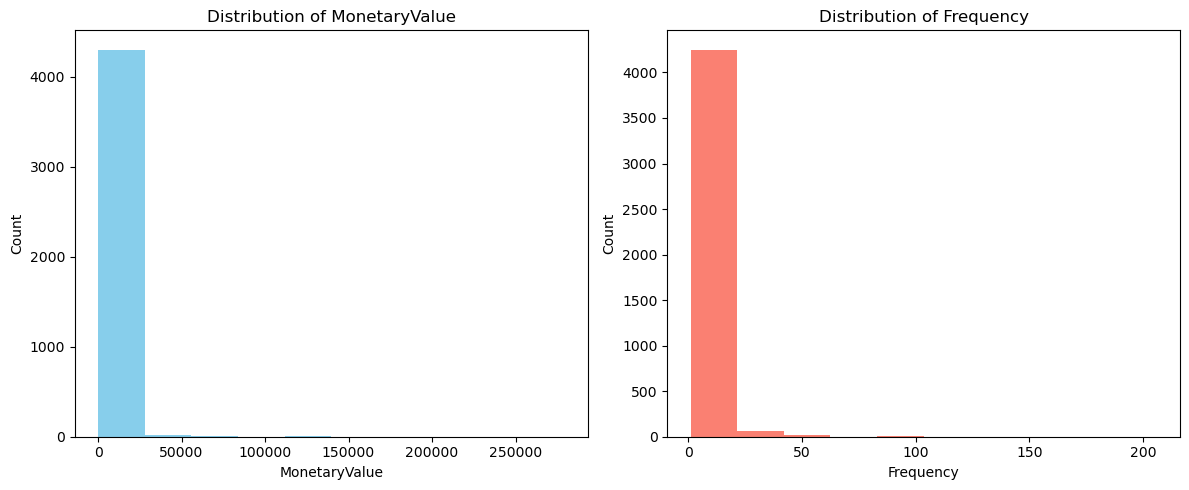

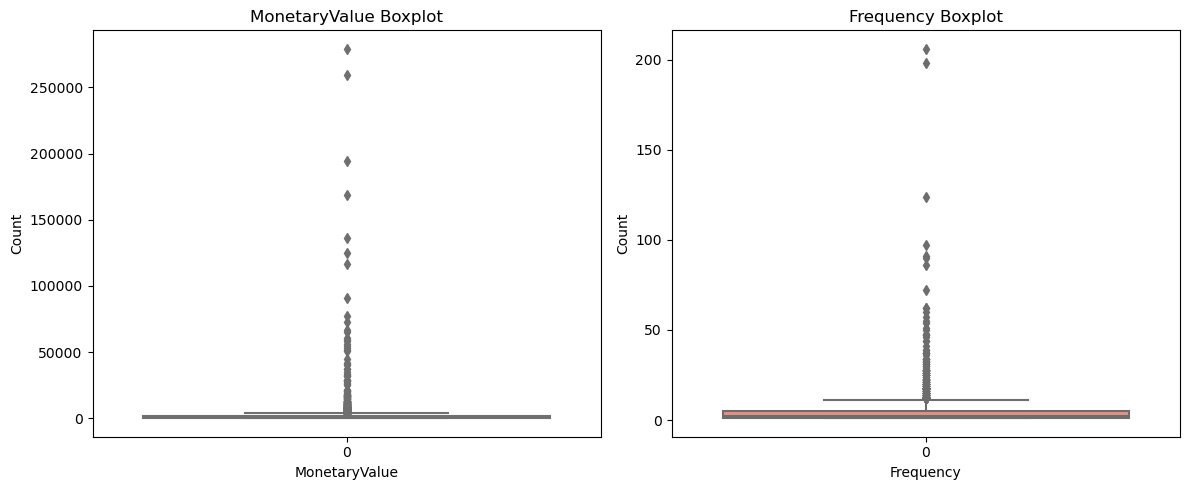

In [384]:
outlierChart(aggregated_df,"MonetaryValue", "Frequency")

In [385]:
#this function calculates the quartiles

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    MQ1 = dataframe[col_name].quantile(th1)
    MQ3 = dataframe[col_name].quantile(th3)
    iqr = MQ3 - MQ1
    upper_limit = MQ3 + 1.5 * iqr
    lower_limit = MQ1 - 1.5 * iqr

    # new_dataset = f"{col_name}_df"
    # new_dataset = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit) ].copy()

    global monetary_outliers_df 
    global frequency_outliers_df 


    if col_name == "MonetaryValue":
        monetary_outliers_df = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit) ].copy()
        return monetary_outliers_df.describe(), monetary_outliers_df
    else:
        frequency_outliers_df = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit) ].copy()
        return frequency_outliers_df.describe(), frequency_outliers_df



In [386]:
# Monetary outliers
determine_outlier_thresholds_iqr(aggregated_df, "MonetaryValue")

(         CustomerID  MonetaryValue   Frequency
 count    425.000000     425.000000  425.000000
 mean   15033.644706   12568.004141   16.647059
 std     1797.854931   26097.899415   19.066978
 min    12346.000000    3622.680000    1.000000
 25%    13324.000000    4359.320000    8.000000
 50%    15005.000000    5891.610000   12.000000
 75%    16655.000000    9430.520000   19.000000
 max    18251.000000  279138.020000  206.000000,
       CustomerID  MonetaryValue  Frequency
 0        12346.0       77183.60          1
 1        12347.0        4310.00          7
 10       12357.0        6207.67          1
 12       12359.0        6372.58          4
 15       12362.0        4737.23         10
 ...          ...            ...        ...
 4287     18223.0        6484.54         14
 4289     18225.0        5509.12         12
 4290     18226.0        5228.05         11
 4293     18229.0        7276.90         20
 4310     18251.0        4314.72          1
 
 [425 rows x 3 columns])

In [387]:
# Frequncy outliers
determine_outlier_thresholds_iqr(aggregated_df, "Frequency")

(         CustomerID  MonetaryValue   Frequency
 count    278.000000     278.000000  278.000000
 mean   15355.669065   14488.006691   23.089928
 std     1745.001840   30142.778160   21.166586
 min    12395.000000    1296.440000   12.000000
 25%    13880.250000    4197.772500   13.000000
 50%    15290.500000    6283.525000   17.000000
 75%    16781.250000   11040.835000   25.000000
 max    18283.000000  279138.020000  206.000000,
       CustomerID  MonetaryValue  Frequency
 39       12395.0        2682.63         12
 55       12415.0      124564.53         20
 69       12431.0        6382.45         15
 75       12437.0        4447.41         18
 100      12471.0       17424.05         27
 ...          ...            ...        ...
 4287     18223.0        6484.54         14
 4289     18225.0        5509.12         12
 4293     18229.0        7276.90         20
 4303     18241.0        2073.09         17
 4332     18283.0        2088.93         16
 
 [278 rows x 3 columns])

In [388]:
frequency_outliers_df

,CustomerID,MonetaryValue,Frequency
39,12395.0,2682.63,12
55,12415.0,124564.53,20
69,12431.0,6382.45,15
75,12437.0,4447.41,18
100,12471.0,17424.05,27
...,...,...,...
4287,18223.0,6484.54,14
4289,18225.0,5509.12,12
4293,18229.0,7276.90,20
4303,18241.0,2073.09,17


In [389]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

**Dealing with outliers outliers**

Three main methods of dealing with outliers:

1) removing them from the dataset: 

1) reducing the weights of outliers (trimming weight) 

2) changing the values of outliers (Winsorisation, trimming, imputation) 

3) using robust estimation techniques (M-estimation).

In [390]:
# create a dataframe that has no outliers
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) ]

In [391]:
non_outliers_df.head()

,CustomerID,MonetaryValue,Frequency
2,12348.0,1437.24,4
3,12349.0,1457.55,1
4,12350.0,294.40,1
5,12352.0,1385.74,7
6,12353.0,89.00,1


In [392]:
# Reset the index of the DataFrame
non_outliers_df.reset_index(inplace=True, drop=True)

In [393]:
non_outliers_df.head()

,CustomerID,MonetaryValue,Frequency
0,12348.0,1437.24,4
1,12349.0,1457.55,1
2,12350.0,294.40,1
3,12352.0,1385.74,7
4,12353.0,89.00,1


In [394]:
non_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency
count,3863.000000,3863.000000,3863.000000
mean,15323.852705,853.814416,2.755113
std,1709.731704,794.608100,2.168124
min,12348.000000,3.750000,1.000000
25%,13850.500000,278.500000,1.000000
50%,15333.000000,570.460000,2.000000
75%,16798.000000,1187.005000,4.000000
max,18287.000000,3619.170000,11.000000


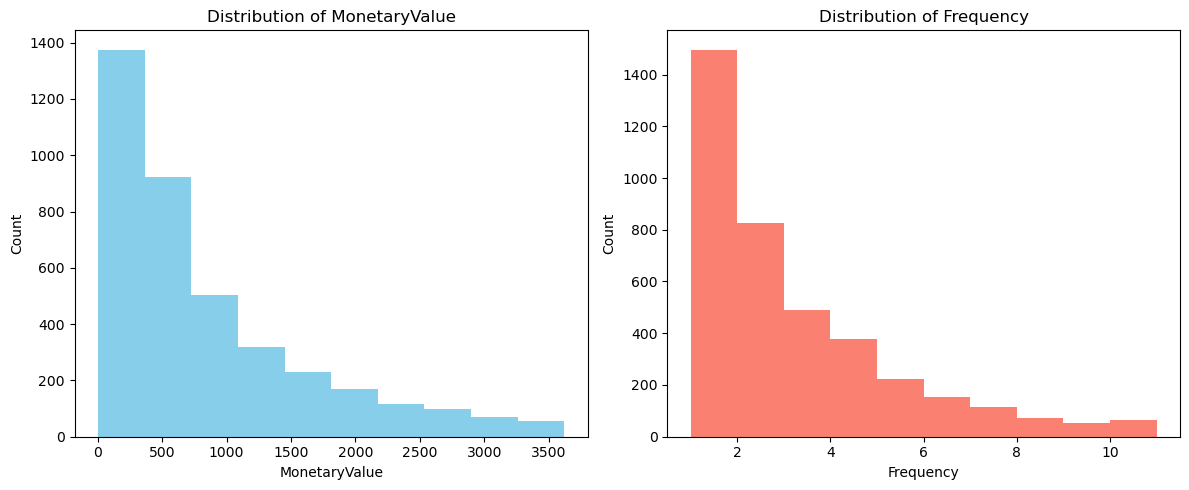

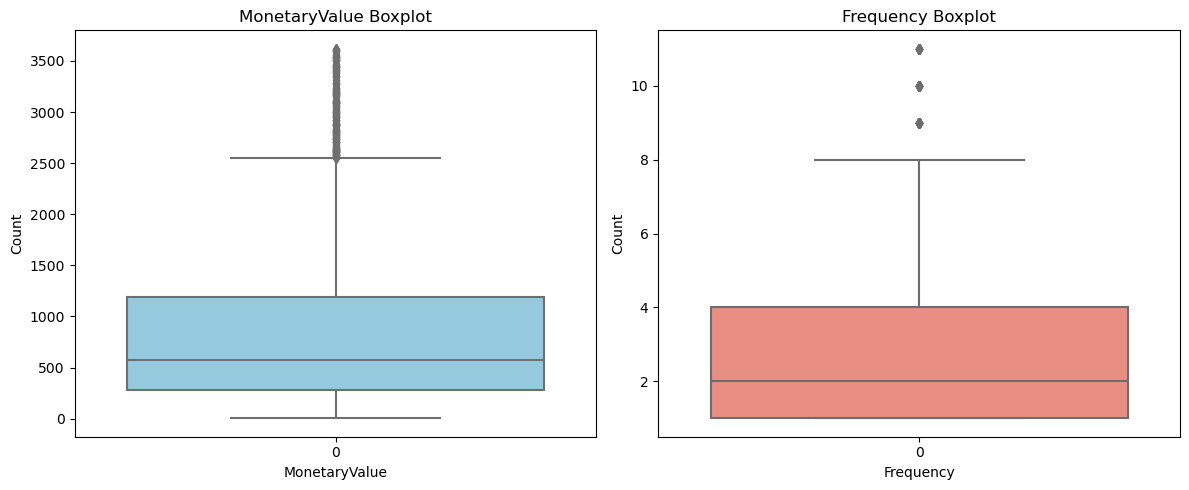

In [395]:
# visualize the dataframe with handled outliers
outlierChart(non_outliers_df,"MonetaryValue", "Frequency")

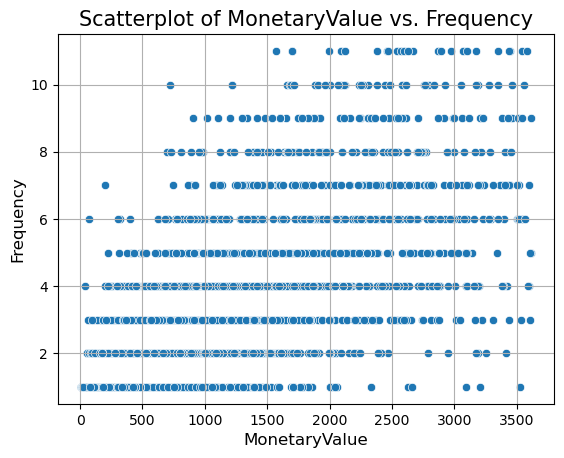

In [398]:

sns.scatterplot(x=non_outliers_df['MonetaryValue'], y=non_outliers_df['Frequency'])

plt.title('Scatterplot of MonetaryValue vs. Frequency', fontsize=15)
plt.xlabel('MonetaryValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

From the plot above, we visualize that our data needs to be scaled into a representation that is more suitable for the downstream estimators.

In [397]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency"]])
scaled_data

array([[ 0.73432565,  0.57425162],
       [ 0.75988873, -0.8096124 ],
       [-0.70410412, -0.8096124 ],
       ...,
       [-0.97292551, -0.8096124 ],
       [-0.85054746, -0.34832439],
       [ 1.23783397,  0.11296362]])

In [401]:
scaled_data_df = pd.DataFrame(data=scaled_data, index=non_outliers_df.index , columns=['MonetaryValue', 'Frequency'])
scaled_data_df

,MonetaryValue,Frequency
0,0.734326,0.574252
1,0.759889,-0.809612
2,-0.704104,-0.809612
3,0.669505,1.958116
4,-0.962630,-0.809612
...,...,...
3858,-0.855771,-0.809612
3859,-0.847338,-0.809612
3860,-0.972926,-0.809612
3861,-0.850547,-0.348324


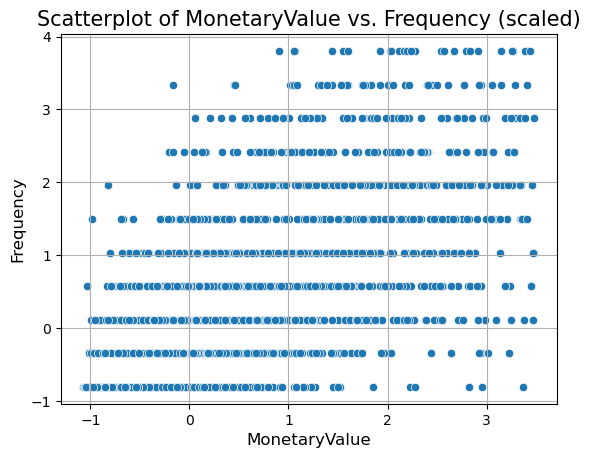

In [402]:
# plot the scaled data
sns.scatterplot(x=scaled_data_df['MonetaryValue'], y=scaled_data_df['Frequency'])

plt.title('Scatterplot of MonetaryValue vs. Frequency (scaled)', fontsize=15)
plt.xlabel('MonetaryValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# K-means Clustering